# Exercise session nº 4
---
# Orientation of Turing Patterns by Morphogen Gradients and Tissue Anisotropies

__*Sacha Ichbiah, 14/02/22, ENS Paris*__

This subject is extracted from : 
> Tom W. Hiscock and Sean G. Megason., *Orientation of Turing-like Patterns by Morphogen Gradients and Tissue Anisotropies*, Cell Systems, 2015.
> https://doi.org/10.1016/j.cels.2015.12.001

> https://ipython-books.github.io/124-simulating-a-partial-differential-equation-reaction-diffusion-systems-and-turing-patterns/

__Periodic patterns__ are found in a wide variety of different organisms, forming across a large range of time and length scales. A number of different models have been proposed to explain the formation of these periodic patterns, most notably Turing’s __reaction-diffusion__ model in which periodicity is generated at the molecular scale. The canonical reaction-diffusion model involves two diffusing molecules: a __rapidly diffusing inhibitor__ molecule and a __slowly diffusing activator__ molecule. Provided that the activator stimulates production of both itself and its inhibitor sufficiently strongly, and that the inhibitor diffuses sufficiently more rapidly than the activator, periodic patterns can spontaneously emerge from an initially homogeneous pattern (termed a __Turing instability__).

![alt text](Images/Zebrafish.png "Title")

The property that forms the focus of this work is __pattern orientation__. Stripes in animal pigment patterns often have a __stereotyped__ direction; e.g., wild-type zebrafish have __stripes parallel__ to their long axis during normal development. However, during aberrant patterning, for example, when the pattern regenerates after damage, or when the pattern proceeds in the absence of some organizing signal, the tight regulation of pattern orientaion is impaired, and we can observe __labyrinthine stripes__ on his body. This phenotype disruption shows that the orientation of the pattern requires to be __regulated__.

This study is based on a single variable description of a generic Turing instability: the __Swift-Hohenberg__ equation. With this equation, the authors find three different ways to orient reliably the stripes of the pattern. During this session, we will study three of them : the morphogen gradient, the tissue anisotropy, and growth. 

---

# Part 1 - Unregulated Turing pattern

### Swift-Hohenberg equation

The Swift-Hohenberg equation can be written in the following way : 

$\begin{equation}
\dfrac{\partial \phi}{\partial t} = a \phi - (\Delta + 1)^2\phi - \phi^3
\end{equation}$

We will simulate it on a $100 \times 100$ grid, corresponding to $\approx 10 $ wavelength, allowing for reasonable convergence times.


### __Question 0__
> Discretize the 2D laplacian $\Delta = \partial_{xx} + \partial_{yy}$ with a Taylor development. Discretize the differential equation with a forward-Euler scheme.

### __Question 1__
> Integrate this equation until convergence and plot the pattern obtained. Repeat the simulation with several different initial conditions to observe the pattern variation.


In [2]:
#If necessary : 
!pip install scikit-image

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

%matplotlib inline

def show_patterns(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()
    
    
#Simulation Parameters
size = 100  # size of the 2D grid
dx = 1 #.*(10**3) / size  # space step
dt = .01  # time step
T = dt*50000 #total duration of the simulation
n = int(T / dt)  # number of iterations

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
step_plot = n // 5

#Simulation Parameters
U = np.random.rand(size, size)*(10**-3)
a = 0.1


#Simulation Loop 
for i in tqdm(range(n), total=n):
    
    # We update the variables.
    U = ...

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

# Part 2 - Stripes orientation with a morphogen gradient

We will change the equation by making $a$ vary with x : 

$
\begin{equation} 
\forall x \in [0,100] : a(x) = -0.2 + \dfrac{x}{500} 
\end{equation}
$

### __Question 2__
> Integrate this varying parameter a to the previous model. What do you observe ?

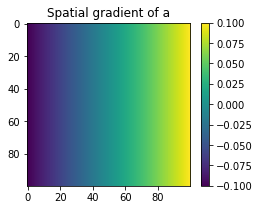

In [7]:
###Simulation parameters
baselinear = np.linspace(-0.1,0.1,size)
linear_potential = np.zeros((size,size))
for i in range(size):
    linear_potential[i] = baselinear
    
a = linear_potential.copy()

plt.figure(figsize=(4,3))
plt.imshow(a)
plt.title("Spatial gradient of a")
plt.colorbar()

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
U = np.random.rand(size, size)*(10**-3)

###Simulation loop :
for i in tqdm(range(n), total=n):
    
    # We update the variables.
    U = ...

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

# Part 3 - Stripes orientation with anisotropic diffusion

We will this time change the equation by replacing the term $(\Delta+1)^2 \text{ by }(\Delta+1)^2 - b \partial_x^2$  : 

$\begin{equation}
\dfrac{\partial \phi}{\partial t} = a \phi - (\Delta + 1)^2\phi + b\partial_x^2\phi - \phi^3
\end{equation}$

With $a=0.1$ and $b =0.1$.

### __Question 3__
> Integrate this varying anisotropic diffusion to the model. What do you observe ?

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

###Simulation parameters
U = np.random.rand(size, size)*(10**-3)
a = 0.1
b = 0.1


###Simulation loop :
for i in tqdm(range(n), total=n):
    
    # We update the variables.
    U= ...

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

# Part 4 - Stripes orientation with anisotropic growth

We will this time make a pattern that grows. At each timestep, we will make the pattern grow (before integrating the Swift-Hohenberg equation as previously) by distorting the spatial lengthscale $x$ : $\phi(x,y,t+\delta t) = \phi(\dfrac{x}{1+b\delta t},y,t) $

$\begin{equation}
\dfrac{\partial \phi}{\partial t} = a \phi - (\Delta + 1)^2\phi - \phi^3
\end{equation}$

### __Question 4__
> Integrate this growth to the model, with $b = 0.001$ and $b = 0.003$. What do you observe ?


__Tip :__ Use the resize function of skimage to distort your Turing pattern.

In [ ]:
from skimage.transform import resize

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
step_plot = n // 5

def show_patterns_long(U, ax=None):
    ax.imshow(U, cmap=plt.cm.copper,
              interpolation='bilinear')
    ax.set_axis_off()

#Simulation Parameters
U = np.random.rand(size, size)*(10**-3)
a = 0.1
b = 0.001


#Simulation Loop 
current_size = size

for i in tqdm(range(n), total=n):
    
    # We distort U : 
    dim_1 = ...
    dim_2 = ...
    U = resize(U, (dim_1,dim_2))
    
    # We update the variables
    U = ...

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns_long(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

# Bonus : Stripes versus dots

If we add a term with a quadratic term, stripes will progressively be replaced by dots : 

$\begin{equation}
\dfrac{\partial \phi}{\partial t} = a \phi + \delta \phi^2 - (\Delta + 1)^2\phi - \phi^3
\end{equation}$

### __Question 5__
> Integrate this quadratic term to the model, with $\delta \in [0.1,0.2,0.3]$. What do you observe ?




In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
step_plot = n // 5


###Simulation parameters
U = np.random.rand(size, size)*(10**-3)
a = 0.1
delta = 0.3


###Simulation loop :
for i in tqdm(range(n), total=n):
    
    # We update the variables.
    U = ...

    # We plot the state of the system at
    # different times.
    if i % step_plot == 0 and i < 5 * step_plot:
        ax = axes.flat[i // step_plot]
        show_patterns(U, ax=ax)
        ax.set_title(f'$t={i * dt:.2f}$')

### Conclusion 

Though the microscopic factor responsible for the turing instability can vary widly, these mechanisms studied previously are very general and can be applied on many systems. For a nice example on developmental biology showing how birds evolved a special organ to vocalize, see :

> E. Kingsley et al., *Identity and novelty in the avian syrinx*, PNAS, 2018.
> https://doi.org/10.1073/pnas.1804586115


![alt text](Images/Bird_patterning.png "Title")



